# Creating the Model Grid

## Import Modules

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Project's Grid

The grid for the project's model will be designed to cover the entire planet, with a grid spacing of 1° comprising 360 columns and 180 rows.

In the data file for the model, the following parameters will be specified in the `PARM04` namelist within the `data` file:

```
usingSphericalPolarGrid=.TRUE.,
delX=1,
delY=1,
xgOrigin=-180,
ygOrigin=-90,
```

This grid can be recreated in Python as follows:

In [23]:
# define the parameters that will be used in the data file
del_x = 1
del_y = 1
xg_origin = -180
ygOrigin = -90
n_rows = 180
n_cols = 360

# recreate the grids that will be used in the model
xc = np.arange(xg_origin + del_x / 2, xg_origin + n_cols * del_x + del_x / 2, del_x)
yc = np.arange(ygOrigin + del_y / 2, ygOrigin + n_rows * del_y + del_y / 2, del_y)
XC, YC = np.meshgrid(xc, yc)

## Visualizing the Grid

The grids above can be visualized as follows:

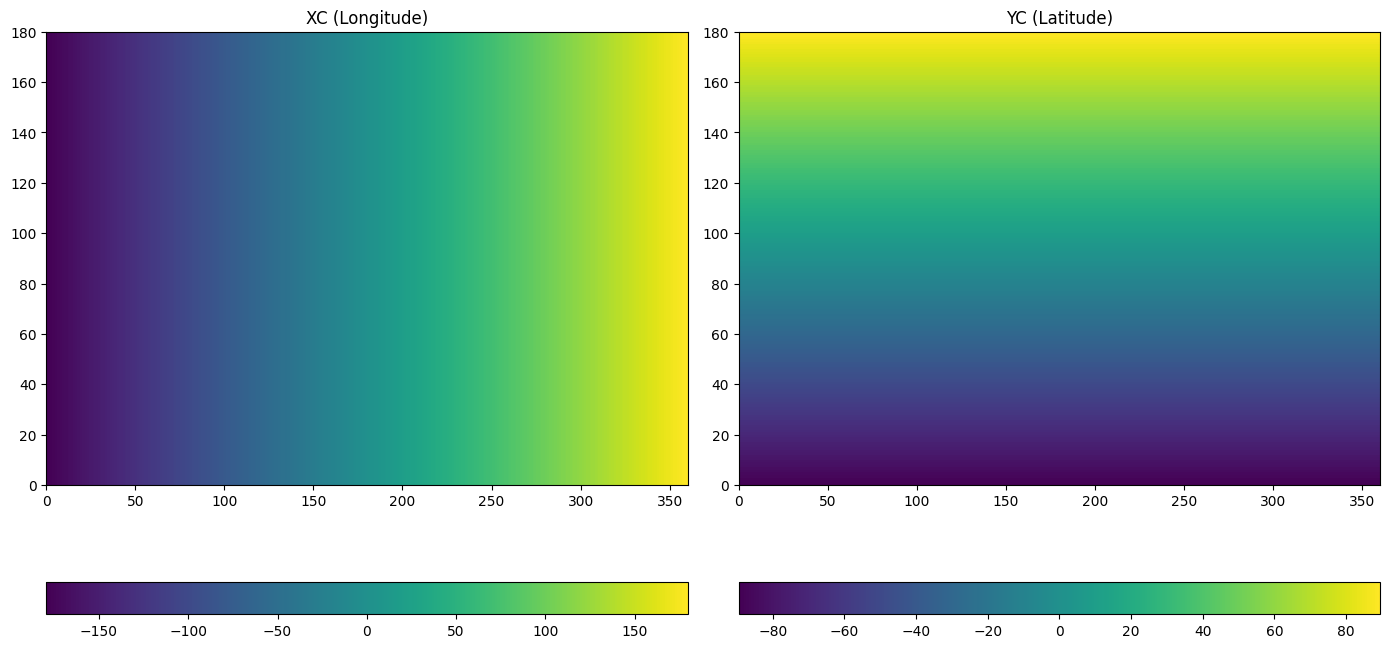

In [30]:
database = [XC, YC]

titles = ['XC (Longitude)', 'YC (Latitude)']

# make a plot of XC and YC
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes = [ax1, ax2]

for index, (ax, data, title) in enumerate(zip(axes, database, titles)):
    c = ax.pcolormesh(data)
    fig.colorbar(c, ax=ax, orientation="horizontal")

    ax.set_title(title)

plt.tight_layout()

## Visualizing the Grid on a Map with Cartopy

To get a sense of where the model is located on the globe, cartopy can be be used to plot the domain on the globe:

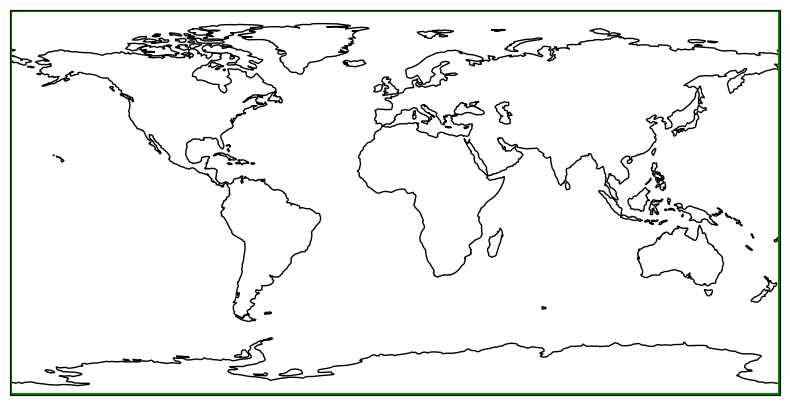

In [25]:
xc_data = [XC[:, 0], XC[:, -1], XC[0, :], XC[-1, :]]

yc_data = [YC[:, 0], YC[:, -1], YC[0, :], YC[-1, :]]

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

for index, (xc, yc) in enumerate(zip(xc_data, yc_data)):
    ax.plot(xc, yc, 'g-', transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

## Visualizing the Grid Spacing

The model grid is defined in terms of units in longitude and latitude although it is useful to quantify the grid spacing in terms of more familiar units, such as meters. The following `great_circle_distance` function can be used to quantify this distance:

In [26]:
def great_circle_distance(lon_ref, lat_ref, Lon, Lat):
    earth_radius = 6371000

    lon_ref_radians = np.radians(lon_ref)

    lat_ref_radians = np.radians(lat_ref)

    lons_radians = np.radians(Lon)

    lats_radians = np.radians(Lat)

    lat_diff = lats_radians - lat_ref_radians

    lon_diff = lons_radians - lon_ref_radians

    d = np.sin(lat_diff * 0.5) ** 2 + np.cos(lat_ref_radians) * np.cos(lats_radians) * np.sin(lon_diff * 0.5) ** 2
    h = 2 * earth_radius * np.arcsin(np.sqrt(d))
    return h

Then, loop through the points to generate inter-point distances in the horizontal (`dXC`) and vertical (`dYC`) directions:

In [27]:
dXC = np.zeros((np.shape(XC)[0], np.shape(XC)[1] - 1))
for row in range(np.shape(XC)[0]):
    for col in range(np.shape(XC)[1] - 1):
        dXC[row, col] = great_circle_distance(XC[row, col], YC[row, col], XC[row, col + 1], YC[row, col + 1])

dYC = np.zeros((np.shape(YC)[0] - 1, np.shape(YC)[1]))
for row in range(np.shape(XC)[0] - 1):
    for col in range(np.shape(XC)[1]):
        dYC[row, col] = great_circle_distance(XC[row, col], YC[row, col], XC[row + 1, col], YC[row + 1, col])

Finally, make a plot of the inter-point distances:

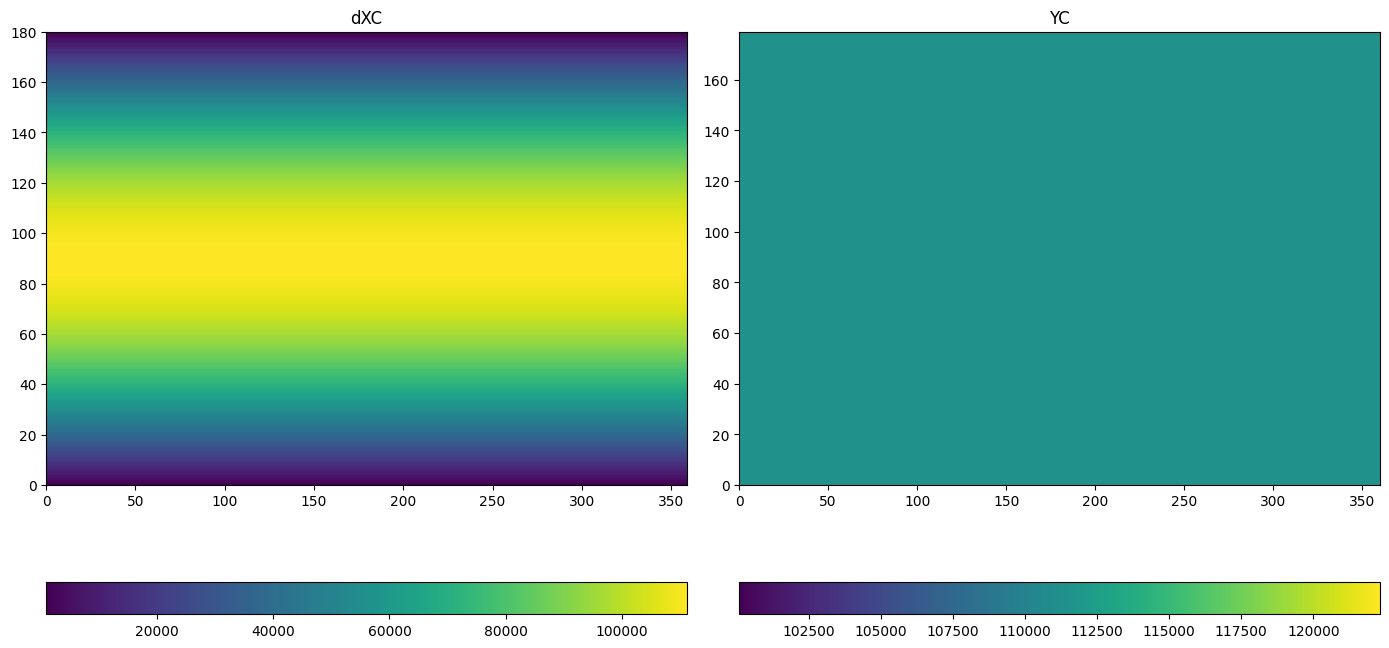

In [29]:
database = [dXC, dYC.round(3)]

titles = ['dXC', 'YC']

# make a plot of XC and YC
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes = [ax1, ax2]

for index, (ax, data, title) in enumerate(zip(axes, database, titles)):
    c = ax.pcolormesh(data)
    fig.colorbar(c, ax=ax, orientation="horizontal")

    ax.set_title(title)


plt.tight_layout()